<a href="https://colab.research.google.com/github/Nishanaziya/DSML/blob/master/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/incomekm.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

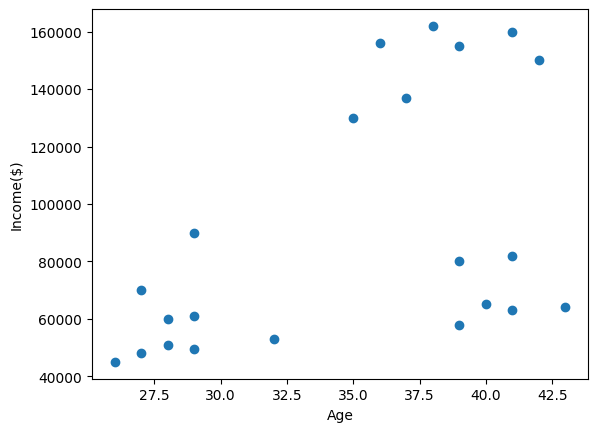

In [ ]:
plt.scatter(df["Age"], df["Income($)"])
plt.xlabel("Age")
plt.ylabel("Income($)")

In [ ]:
scaler = StandardScaler()
df["Income($)"] = scaler.fit_transform(df[["Income($)"]])
df["Age"] = scaler.fit_transform(df[["Age"]])

In [ ]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [ ]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,0
1,Michael,-1.009157,-0.010159,0
2,Mohan,-1.009157,-0.692421,0
3,Ismail,-1.182606,-0.715947,0
4,Kory,1.245679,1.401417,1


In [ ]:
km.cluster_centers_

array([[-1.1247901 , -0.74862223],
       [ 0.60143983,  1.40141653],
       [ 0.98550535, -0.51205261]])

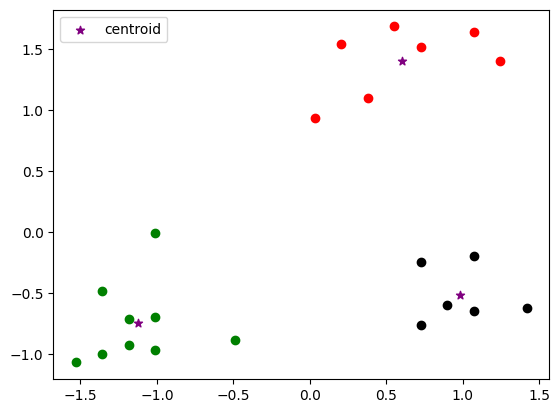

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1["Income($)"], color = "green")
plt.scatter(df2.Age,df2["Income($)"], color = "red")
plt.scatter(df3.Age,df3["Income($)"], color = "black")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

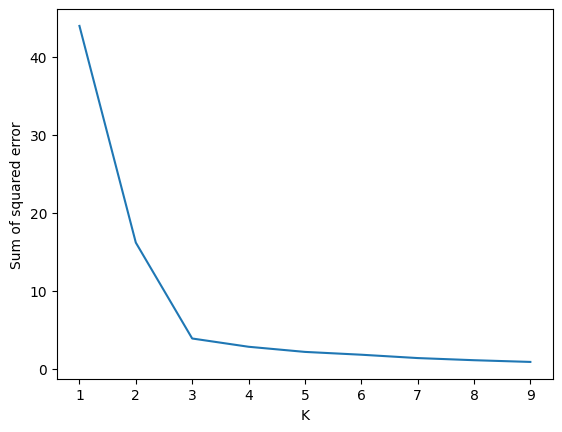

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)